### Chapter 7 : OOP II: Building Classes

In [1]:
# Building Class

'''
    Our objective :: Defining and building a Class
    
    eg.
        < Consumer >
        - who hold and spend cash
        - consume goods
        - work and earn cash
    
'''

'\n    Class Definitions\n    \n        < Consumer >\n        - who hold and spend cash\n        - consume goods\n        - work and earn cash    \n'

In [6]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x = [1,5,4] # list class --> xÎäî list ÌÅ¥ÎûòÏä§Ïùò Í∞ùÏ≤¥(instant), ÌÅ¥ÎûòÏä§Îäî attribute(=data(field) + method)Ïùò ÏßëÌï©
print(x.__class__)
print(dir(x)) # listÍ∞Ä Í∞ñÎäî 

<class 'list'>
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [11]:
# define and build the attribute of class(ex. (person) consumer class like homo economicus)

# initial wealth(data)Î•º Í∞ÄÏßÑ ConsumerÎäî ÎèàÏùÑ Î≤åÍ≥† ÏÜåÎπÑÎ•º ÌïúÎã§(method)
# Any instance data should be prepended with self

class Consumer:
    def __init__(self, w):
        "Initialize consumer with w dolloars of wealth"
        self.wealth = w

    def earn(self, y):
        "Consumer with initial wealth x earns y"
        self.wealth += y

    def spend(self, y):
        '''Consumer with initial wealth x spends y
           But consumer can only spend feasible amount of dollars '''
        new_wealth = self.wealth - y
        if(new_wealth < 0):
            print("Insufficient Funds")
        else:
            self.wealth = new_wealth

In [12]:
c1 = Consumer(100)

print(c1.__class__)
print(dir(c1))

<class '__main__.Consumer'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'earn', 'spend', 'wealth']


In [13]:
c1.__dict__

{'wealth': 100}

In [14]:
# Methods actually live inside a class object formed when the interpreter reads the class definition

print(Consumer.__dict__) # show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x00000220BEF88700>, 'earn': <function Consumer.earn at 0x00000220BEF88790>, 'spend': <function Consumer.spend at 0x00000220BEF88820>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


In [ ]:
## Example

### Chapter 8 : The Scientific Libraries

In [15]:
#!pip install quantecon

In [16]:
'''
    Python's Scientific Libraries
    
    (1) NumPy 
    (2) Scipy 
    (3) Matplotlib 
    (4) Pandas
    
    relatively new library : Numba
    
'''

"\n    Python's Scientific Libraries\n    \n    (1) NumPy \n    (2) Scipy \n    (3) Matplotlib \n    (4) Pandas\n    \n"

In [17]:
# Vetorization

''' Vectorization can be used to speed up high level languages in numerical application '''
''' The key idea is to send array processing operations in batch to pre-compiled and efficient native machine code. '''

' The key idea is to send array processing operations in batch to pre-compiled and efficient native machine code. '

In [18]:
import random
import numpy as np
import quantecon as qe

In [20]:
# non-vectorized code
# use a native Python loop to generate, square, and then sum a large number of random variables

n = 1_000_000 # intÎ°ú Ïù∏Ïãù
type(n)

int

In [21]:
%%time
y = 0
for i in range(n):
    x = random.uniform(0, 1)
    y += x**2

Wall time: 747 ms


In [22]:
%%time
x = np.random.uniform(0, 1, n)
y = np.sum(x**2)

Wall time: 24.9 ms


In [23]:
# Universal Function
'''
    Universal Function means that they
        ‚Ä¢ map scalars into scalars, as expected
        ‚Ä¢ map arrays into arrays, acting element-wise
        
    By exploiting ufuncs, many operations can be vectorized.
    
'''

'\n    Universal Function means that they\n        ‚Ä¢ map scalars into scalars, as expected\n        ‚Ä¢ map arrays into arrays, acting element-wise\n'

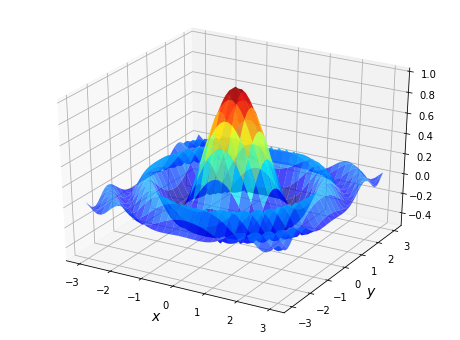

In [27]:
# example -> np.cos()

import matplotlib.pyplot as plt
import numpy as np

# 3-Dimensional plotting
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

%matplotlib inline


'''
     consider the problem of maximizing a function ùëì of two variables (ùë•, ùë¶) over the square [‚àíùëé, ùëé] √ó [‚àíùëé, ùëé].
     
     ùëì(ùë•, ùë¶) = cos(ùë•2 + ùë¶2) / 1 + ùë•2 + ùë¶2  and ùëé = 3
     
'''

def cosine_func(x,y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
               y,
               cosine_func(x,y),
               rstride=2, cstride=2,
               cmap = cm.jet,
               alpha=0.7,
               linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
plt.show()

In [28]:
x

array([[-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       ...,
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ],
       [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ]])

In [29]:
y

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-2.87755102, -2.87755102, -2.87755102, ..., -2.87755102,
        -2.87755102, -2.87755102],
       [-2.75510204, -2.75510204, -2.75510204, ..., -2.75510204,
        -2.75510204, -2.75510204],
       ...,
       [ 2.75510204,  2.75510204,  2.75510204, ...,  2.75510204,
         2.75510204,  2.75510204],
       [ 2.87755102,  2.87755102,  2.87755102, ...,  2.87755102,
         2.87755102,  2.87755102],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])